In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# Preprocessing and pipeline utilities
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [22]:
df = pd.read_csv(r'C:\Users\ta an\Desktop\Risk_warning\Credit_Risk_Scored_By_dlq2yrs.csv')
df

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs,credit_score
0,0.006999,38,0,0.302150,5440,4,0,1,0,3,0,693
1,0.704592,63,0,0.471441,8000,9,0,1,0,0,0,750
2,0.063113,57,0,0.068586,5000,17,0,0,0,0,0,729
3,0.368397,68,0,0.296273,6250,16,0,2,0,0,0,734
4,1.000000,34,1,0.000000,3500,0,0,0,0,1,0,665
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,1.000000,46,0,170.398010,401,3,2,0,0,2,1,233
16710,1.135552,41,2,0.845887,7500,12,0,4,1,0,1,357
16711,0.920107,31,1,0.176732,1125,4,1,0,0,0,1,323
16712,0.983825,55,0,0.064116,4600,2,1,0,0,6,1,437


In [23]:
print('Duplicated Data',df.duplicated().sum())
#duplicados = df[df.duplicated()]
#print(duplicados)
print('Duplicate Data',df.drop_duplicates(inplace=True))

Duplicated Data 0
Duplicate Data None


In [24]:
# Relación ingreso-deuda
df['income_to_debt'] = df['monthly_inc'] / (df['debt_ratio'] + 1e-5)  # evitamos división por cero

# Total de morosidades (past)
df['total_late'] = df['late_30_59'] + df['late_60_89'] + df['late_90']

# Edad por crédito activo (¿tiene experiencia crediticia?)
df['age_per_credit'] = df['age'] / (df['open_credit'] + 1)

# Ratio real estate vs total créditos (¿cuántos créditos son hipotecarios?)
df['real_estate_ratio'] = df['real_estate'] / (df['open_credit'] + 1)


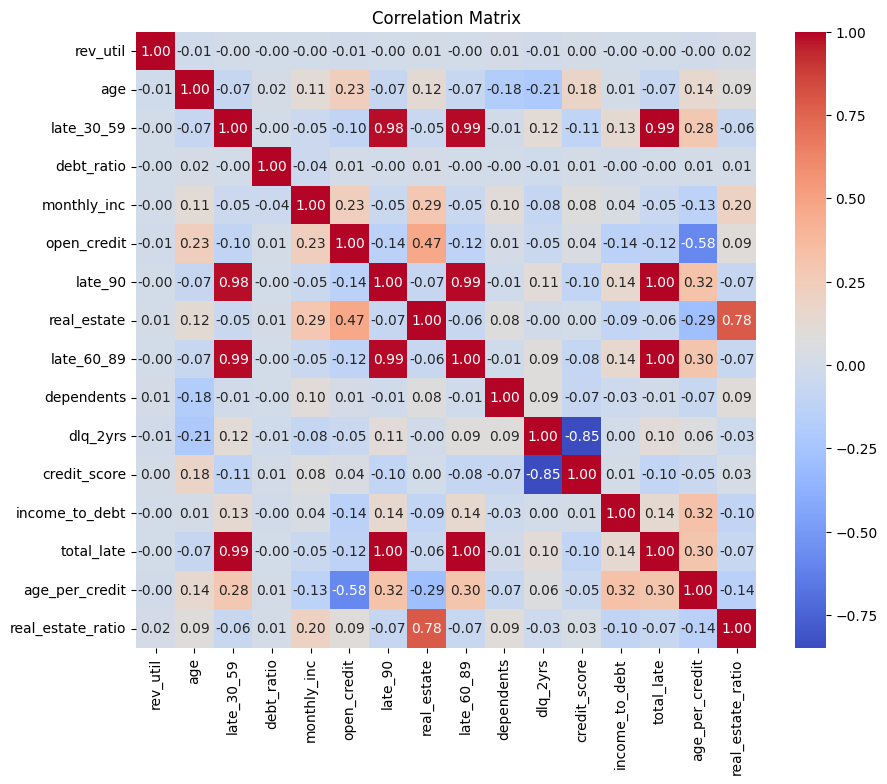

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 💡 Thư viện bổ sung cho XGBoost và LightGBM
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 🎯 Biến mục tiêu
target = 'credit_score'

# 🧠 Tách features (X) và target (y)
X = df.drop(columns=[target])
y = df[target]

# ✨ Xử lý missing nếu có (fill hoặc drop)
X = X.fillna(0)

# 🚀 Tách train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧪 Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📦 Các mô hình hồi quy thử nghiệm
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# 🎯 Huấn luyện và đánh giá
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"🔍 {name}")
    print(f"📉 MAE: {mae:.2f}")
    print(f"📉 RMSE: {rmse:.2f}")
    print(f"📈 R²: {r2:.4f}")
    print("-" * 40)


In [27]:
# train_credit_score_model.py
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------- 1. Load data -----------------
# Giả sử file CSV có cột target = 'credit_score' và các features cơ bản
df = pd.read_csv(r"C:\Users\ta an\Desktop\Risk_warning\Credit_Risk_Scored_By_dlq2yrs.csv")  # <-- đổi tên file của bạn

target = 'credit_score'
base_features = ['monthly_inc','age','debt_ratio','open_credit','real_estate',
                 'late_30_59','late_60_89','late_90','dependents','rev_util']

# fill missing nếu có
df = df.fillna(0)

X = df[base_features]
y = df[target]

# ----------------- 2. Train/test split -----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- 3. StandardScaler -----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------- 4. Train Lasso Regression -----------------
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# ----------------- 5. Đánh giá -----------------
y_pred = lasso_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Lasso Regression đánh giá:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# ----------------- 6. Lưu model + scaler -----------------
joblib.dump({'model': lasso_model, 'scaler': scaler}, "credit_score_model.pkl")
print("💾 Model và scaler đã được lưu vào 'credit_score_model.pkl'")


✅ Lasso Regression đánh giá:
MAE: 144.73
RMSE: 169.74
R²: 0.0741
💾 Model và scaler đã được lưu vào 'credit_score_model.pkl'
